In [35]:
import numpy as np
import matplotlib.pyplot as plt
input_patterns=np.load('input_patterns.npy')
weights=np.load('weights.npy')

In [113]:
def update_theta(theta_BCM,post_syn_patterns):
    dt=0.001
    BCM_target = 2.0
    tau_BCM=0.01
    #post_syn_patterns += dt*(-1*post_syn_patterns + np.dot(W,update_rates(pre_syn_patterns)))
    #Ex= post_syn_patterns*(0.5 * (np.sign(post_syn_patterns) + 1))
    theta_BCM+=dt*(-theta_BCM+(post_syn_patterns*(post_syn_patterns/BCM_target)))/tau_BCM
    #print('theta_BCM',theta_BCM)
    return theta_BCM

def update_w(W,pre_syn_patterns,post_syn_patterns,theta_BCM):
    dt=0.01
    tau_w=0.01
    W_max=1.0
    W+=dt*(pre_syn_patterns*np.dot(post_syn_patterns,(post_syn_patterns-theta_BCM)))/tau_w
    W = W*(0.5 * (np.sign(W) + 1))

    # bounding weights below max value
    W[W>W_max] = W_max
    return W


def update_rates(x):
    #rates = x
    r_0 = 1.0
    r_max = 20.0
    x[x<=0] = r_0*np.tanh(x[x<=0]/r_0)
    x[x>0] = (r_max-r_0)*np.tanh(x[x>0]/(r_max-r_0))
    return x
def one_timestep(W,pre_syn_patterns,post_syn_patterns,theta_BCM):
    dt=0.001
    #new_W=update_w(W,pre_syn_patterns,post_syn_patterns,theta_BCM)
    #new_theta_BCM=update_theta(theta_BCM,W,post_syn_patterns)
    new_post_syn_patterns =post_syn_patterns+(-1*post_syn_patterns + np.dot(W,update_rates(pre_syn_patterns)))
    new_post_syn_patterns= new_post_syn_patterns*(0.5 * (np.sign(new_post_syn_patterns) + 1))
    new_theta_BCM=update_theta(theta_BCM,post_syn_patterns)
    #print('prim',theta_BCM)
    new_W=update_w(W,pre_syn_patterns,post_syn_patterns,theta_BCM)
    #theta_BCM=update_theta(theta_BCM,W,post_syn_patterns)
    #return post_syn_patterns,new_W,new_theta_BCM
    return new_post_syn_patterns,new_W,new_theta_BCM

def run_sim(W,pre_syn_patterns):
    post_syn_patterns=np.array([0.0])
    T=10000
    Ws=[]
    theta_BCM=np.array([0.5])
    
    
    xs=[]
    thrs=[]
    for i in range(T):
        post_syn_patterns, W, theta_BCM=one_timestep(W,pre_syn_patterns[:,i],post_syn_patterns,theta_BCM)
        #print('double',theta_BCM)
        #print(post_syn_patterns)
        #print(W)
        Ws.append(W)
        xs.append(post_syn_patterns)
        thrs.append(theta_BCM[0])
    xs=np.array(xs)
    return xs, Ws, thrs

In [114]:
W=weights.copy()
print(W)
pre_syn_patterns=input_patterns
xs,Ws,thrs=run_sim(W,pre_syn_patterns)

[7.96269589 6.4837434  6.33272184 ... 1.64408282 0.8325417  0.85973226]


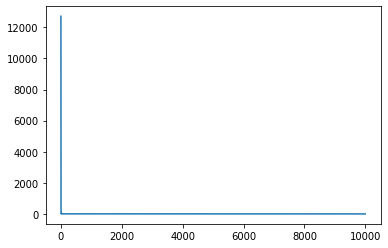

In [115]:
plt.plot(xs)

[0.45, 8083692.5587410275, 7501344.174994654, 6788086.367368859, 6115488.080142008, 5507458.274176765, 4958366.162983557, 4463398.916629044, 4017471.9047685796, 3615800.6098928284, 3254467.3897337345, 2929074.071995231, 2636240.310670133, 2372763.2265884075, 2135529.1041536657, 1922010.641963176, 1729851.297965458, 1556870.514291151, 1401184.5765438285, 1261069.2669665194, 1134966.0352271246, 1021469.4317044121, 919323.9165089577, 827393.0540264889, 744654.1427668044, 670189.8601269809, 603172.0057511398, 542854.8051760258, 488569.32465842325, 439712.3921925809, 395741.15297332284, 356167.03767599055, 320550.3339083915, 288495.3005175523, 259645.77046579708, 233681.19341921736, 210313.07407729563, 189281.76666956607, 170353.59000260948, 153318.23100234853, 137987.53953897062, 124189.91722193052, 111770.92549973747, 100593.83294976372, 90534.44965478734, 81481.00468930861, 73332.90422037775, 65999.61379833997, 59399.65241850597, 53459.68717665537, 48113.71845898983, 43302.34661309085, 3

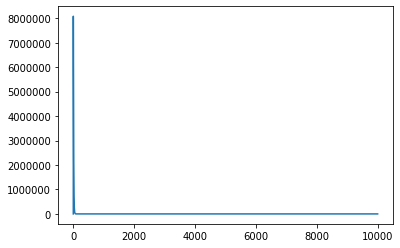

In [116]:
plt.plot(thrs)
print(thrs)

In [28]:
print(xs)

[[ 0.00323372]
 [ 0.02322188]
 [ 0.01262334]
 ...
 [-0.00670147]
 [-0.00311325]
 [-0.00398083]]


(10000, 1105)


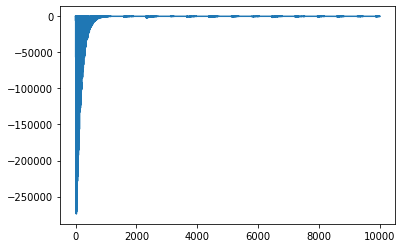

In [52]:
Ws=np.array(Ws)
print(Ws.shape)
plt.plot(Ws.T[2])